In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [78]:
cols = ['content', 'date']

In [79]:
cd C:\Users\ACER\Documents\project\csv

C:\Users\ACER\Documents\project\csv


In [80]:
df = pd.read_csv("ekitidecides2.csv", header=None, names=cols)

In [81]:
df.head()

,content,date
0,"FG spending Abacha’s loot on Ekiti election, s...",12-Jul-18
1,Ekiti you are endowed with Professors. Please ...,12-Jul-18
2,@Naijavote does it imply that there are at lea...,12-Jul-18
3,'Fayemi is a loser'- I did a vox pop in #Ekiti...,12-Jul-18
4,My conclusion from the Ekiti election's debate...,12-Jul-18


In [82]:
df.drop(['date'],axis=1,inplace=True)

In [83]:
df.head()

,content
0,"FG spending Abacha’s loot on Ekiti election, s..."
1,Ekiti you are endowed with Professors. Please ...
2,@Naijavote does it imply that there are at lea...
3,'Fayemi is a loser'- I did a vox pop in #Ekiti...
4,My conclusion from the Ekiti election's debate...


In [84]:
from textblob import TextBlob

In [85]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [86]:
df['Polarity'] = df['content'].apply(sentiment).apply(lambda x: x[0])

In [87]:
df.head(20)

,content,Polarity
0,"FG spending Abacha’s loot on Ekiti election, s...",0.000000
1,Ekiti you are endowed with Professors. Please ...,0.850000
2,@Naijavote does it imply that there are at lea...,-0.300000
3,'Fayemi is a loser'- I did a vox pop in #Ekiti...,-0.075000
4,My conclusion from the Ekiti election's debate...,0.257143
5,"In the era of smart phones and viral videos, h...",0.016071
6,The Moment Tyrannical Nigerian Police Fire On ...,0.000000
7,"Ekiti: Why Policemen tear-gassed Fayose, PDP s...",0.000000
8,The Ekiti Gubernatorial elections & all the dr...,0.700000
9,"#Ekiti2018: APC, PDP locked in verbal attacks ...",0.000000


In [88]:
%time

#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(df)):
    if ((df.iloc[i]['Polarity'] >= 0)):
        predicted_value.append('positive')#positive
        i = i+1
    
    else:
        predicted_value.append('negative')#negative
        i = i+1
        
        

Wall time: 0 ns


In [89]:
df['sentiment'] = predicted_value

In [90]:
len(df['sentiment'])

722

In [91]:
df.head(20)

,content,Polarity,sentiment
0,"FG spending Abacha’s loot on Ekiti election, s...",0.000000,positive
1,Ekiti you are endowed with Professors. Please ...,0.850000,positive
2,@Naijavote does it imply that there are at lea...,-0.300000,negative
3,'Fayemi is a loser'- I did a vox pop in #Ekiti...,-0.075000,negative
4,My conclusion from the Ekiti election's debate...,0.257143,positive
5,"In the era of smart phones and viral videos, h...",0.016071,positive
6,The Moment Tyrannical Nigerian Police Fire On ...,0.000000,positive
7,"Ekiti: Why Policemen tear-gassed Fayose, PDP s...",0.000000,positive
8,The Ekiti Gubernatorial elections & all the dr...,0.700000,positive
9,"#Ekiti2018: APC, PDP locked in verbal attacks ...",0.000000,positive


In [92]:
df[df.sentiment == 'negative'].head(20)

,content,Polarity,sentiment
2,@Naijavote does it imply that there are at lea...,-0.300000,negative
3,'Fayemi is a loser'- I did a vox pop in #Ekiti...,-0.075000,negative
18,Election is not decided on Twitter..Board #250...,-0.300000,negative
19,"God told me if Ekiti election is fraudulent, 2...",-0.225000,negative
27,I am absolutely disappointed in the all the po...,-0.375000,negative
29,What's currently going on in Ekiti State for #...,-0.108333,negative
32,Heard that Banks in Akure Ondo State #Nigeria ...,-0.125000,negative
49,#Ekitidecides Ekiti debate 2018. - Alliance Fo...,-0.200000,negative
52,PDP tendered video evidence of N18bn allegedly...,-0.100000,negative
61,Kayode Fayemi has a chance when he was governo...,-0.075000,negative


In [93]:
df[df.sentiment == 'positive'].head(20)

,content,Polarity,sentiment
0,"FG spending Abacha’s loot on Ekiti election, s...",0.000000,positive
1,Ekiti you are endowed with Professors. Please ...,0.850000,positive
4,My conclusion from the Ekiti election's debate...,0.257143,positive
5,"In the era of smart phones and viral videos, h...",0.016071,positive
6,The Moment Tyrannical Nigerian Police Fire On ...,0.000000,positive
7,"Ekiti: Why Policemen tear-gassed Fayose, PDP s...",0.000000,positive
8,The Ekiti Gubernatorial elections & all the dr...,0.700000,positive
9,"#Ekiti2018: APC, PDP locked in verbal attacks ...",0.000000,positive
10,"At the end of the day, it’s an election, not w...",0.000000,positive
11,He who dares wins. Ekiti here I come........#E...,0.300000,positive


In [94]:
df.sentiment.value_counts()

positive    620
negative    102
Name: sentiment, dtype: int64

In [95]:
import nltk
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS


In [96]:
df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

0      FG spending Abacha’s loot on Ekiti election, s...
1      Ekiti you are endowed with Professors. Please ...
2      @Naijavote does it imply that there are at lea...
3      'Fayemi is a loser'- I did a vox pop in #Ekiti...
4      My conclusion from the Ekiti election's debate...
5      In the era of smart phones and viral videos, h...
6      The Moment Tyrannical Nigerian Police Fire On ...
7      Ekiti: Why Policemen tear-gassed Fayose, PDP s...
8      The Ekiti Gubernatorial elections & all the dr...
9      #Ekiti2018: APC, PDP locked in verbal attacks ...
10     At the end of the day, it’s an election, not w...
11     He who dares wins. Ekiti here I come........#E...
12     #EKITIDECIDES......How it will happen...\n\nFr...
13     Retweeted http://NAIJ.com  (@naijcom):\n\nPict...
14     Retweeted Official PDP Nigeria (@OfficialPDPNi...
15     I heard that APC are sharing money in Ekiti St...
16     All eyes on #EkitiDecides.\n\nWhat if we could...
17     Retweeted http://NAIJ.co

In [97]:
#pat1 = r'@[A-Za-z0-9_]+'
pat1 = r"([@#][A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([http/s?://[^ ]+])"
pat2 = r'(pic.twitter.com\S+)|(twitter.com\S+)'
#pat2 = r'http/s?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not","today's":"today","mkt":"market", "let's":"let us","didnt":"did not"}

#noun_dic ={"today's":"today","buhari's":"buhari","adminstration's":"administration"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(content):
    soup = BeautifulSoup(content, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    #noun_handled = 
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [98]:
testing = df.content[:100]

In [99]:
test_result = []
for t in testing:
    test_result.append(tweet_cleaner_updated(t))
test_result

['fg spending abachas loot on ekiti election says olusola',
 'ekiti you are endowed with professors please be wise wish you the best',
 'does it imply that there are at least million security men on ground in ekiti for the elections please clarify',
 'fayemi is loser did vox pop in about this forthcoming full video is on youtube channel naija politics isnt for the faint hearted sigh',
 'my conclusion from the ekiti elections debate was that we youth are ready to take the right leadership role in this country god help us in ekiti to choose our right leader',
 'in the era of smart phones and viral videos how come we havent seen video of this tear gas incident in ekiti gov fayose also alleged that he was physically assaulted video evidence will go long way',
 'the moment tyrannical nigerian police fire on unarmed ekiti people via',
 'ekiti why policemen teargassed fayose pdp supporters',
 'the ekiti gubernatorial elections all the drama surrounding it just has to end on good note tomorrow

In [100]:
nums = [0,722]

In [101]:
%%time
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%722 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(df['content'][i]))

Cleaning and parsing the tweets...

Tweets 722 of 722 has been processed
Wall time: 1.41 s


In [102]:
len(clean_tweet_texts)

722

In [103]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['Content'])
clean_df['Sentiment'] = df.sentiment

clean_df.head()

,Content,Sentiment
0,fg spending abachas loot on ekiti election say...,positive
1,ekiti you are endowed with professors please b...,positive
2,does it imply that there are at least million ...,negative
3,fayemi is loser did vox pop in about this fort...,negative
4,my conclusion from the ekiti elections debate ...,positive


In [104]:
clean_df.to_csv('clean_ekitibinary.csv',encoding='utf-8')

In [151]:
csv = 'clean_ekitibinary.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,Content,Sentiment
0,fg spending abachas loot on ekiti election say...,positive
1,ekiti you are endowed with professors please b...,positive
2,does it imply that there are at least million ...,negative
3,fayemi is loser did vox pop in about this fort...,negative
4,my conclusion from the ekiti elections debate ...,positive


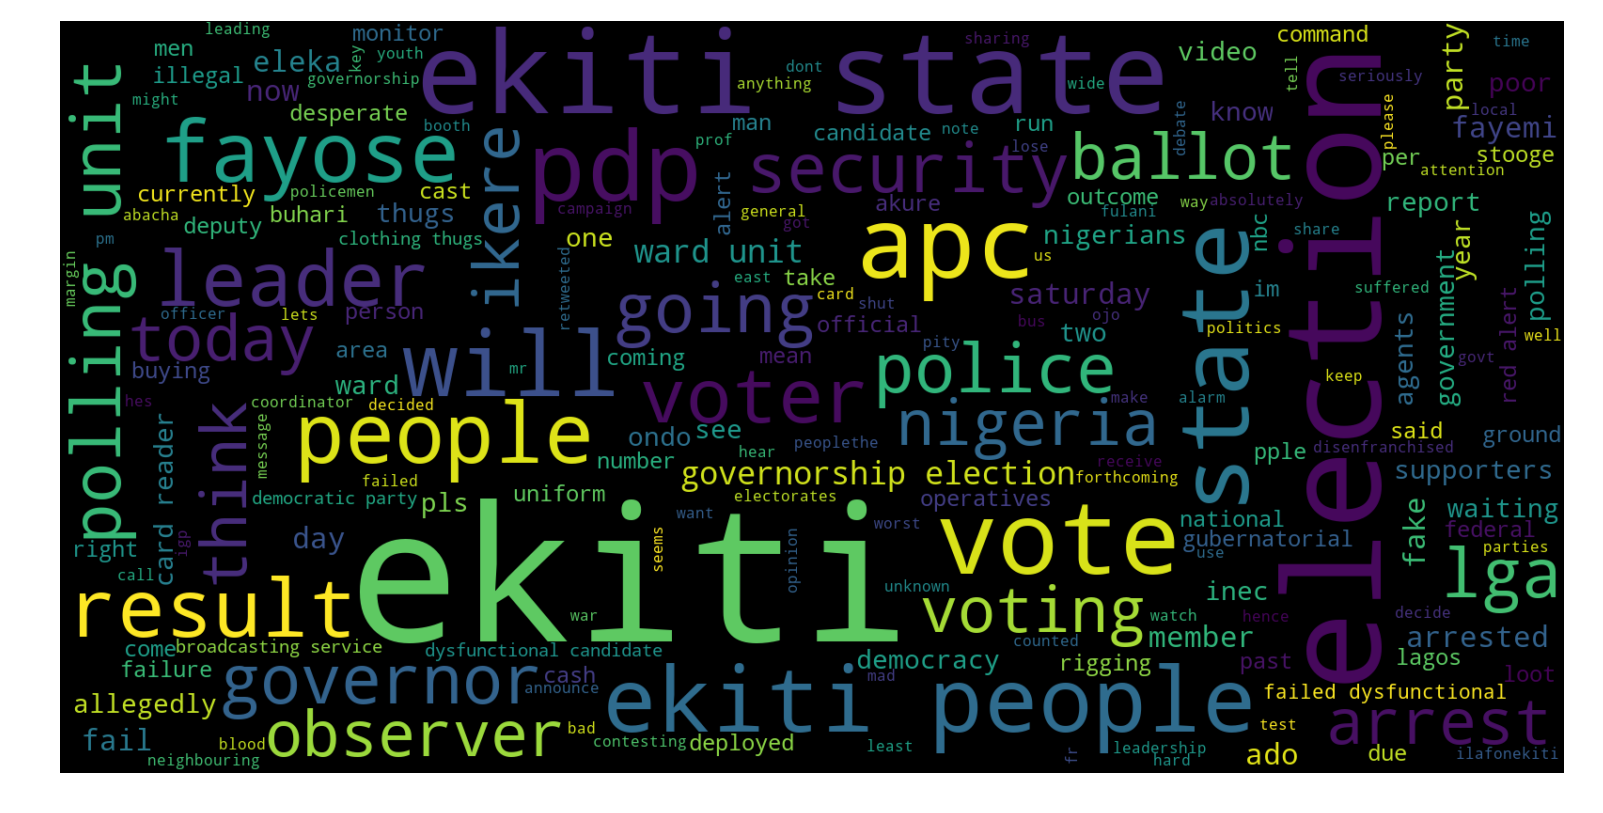

In [106]:
#wordcloud for negative sentiment
neg_tweets = my_df[my_df.Sentiment == 'negative']
neg_string = []
for t in neg_tweets.Content:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

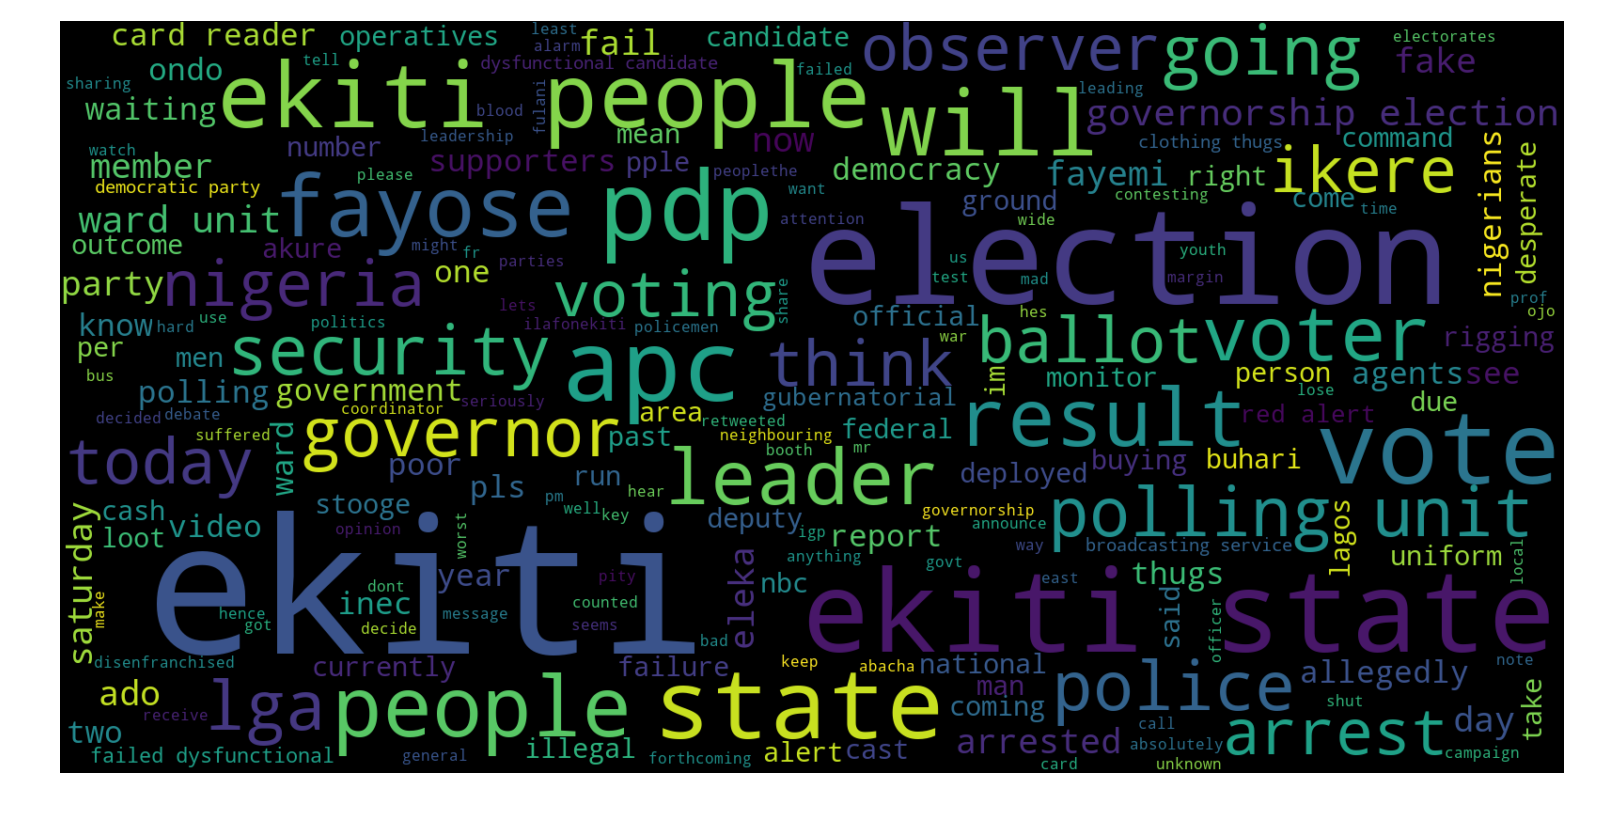

In [107]:
#wordcloud for negative sentiment
pos_tweets = my_df[my_df.Sentiment == 'positive']
pos_string = []
for t in pos_tweets.Content:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Creating a wordcloud from stopwords

In [152]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

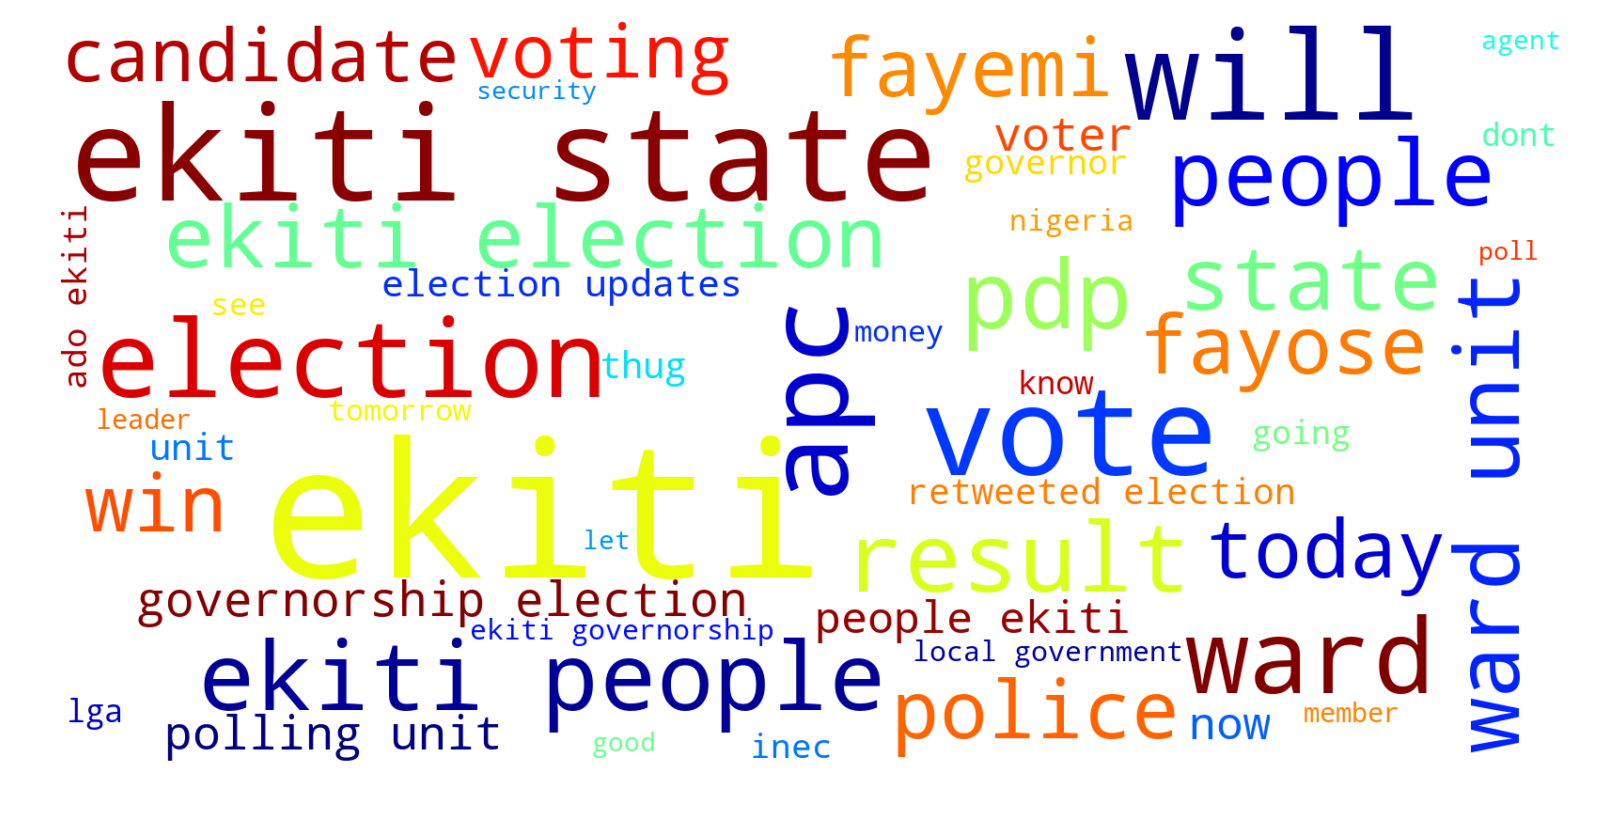

In [153]:
#Positive - Original dataset
tw_pos = my_df[my_df['Sentiment'] == 'positive']['Content']
word_cloud(tw_pos)

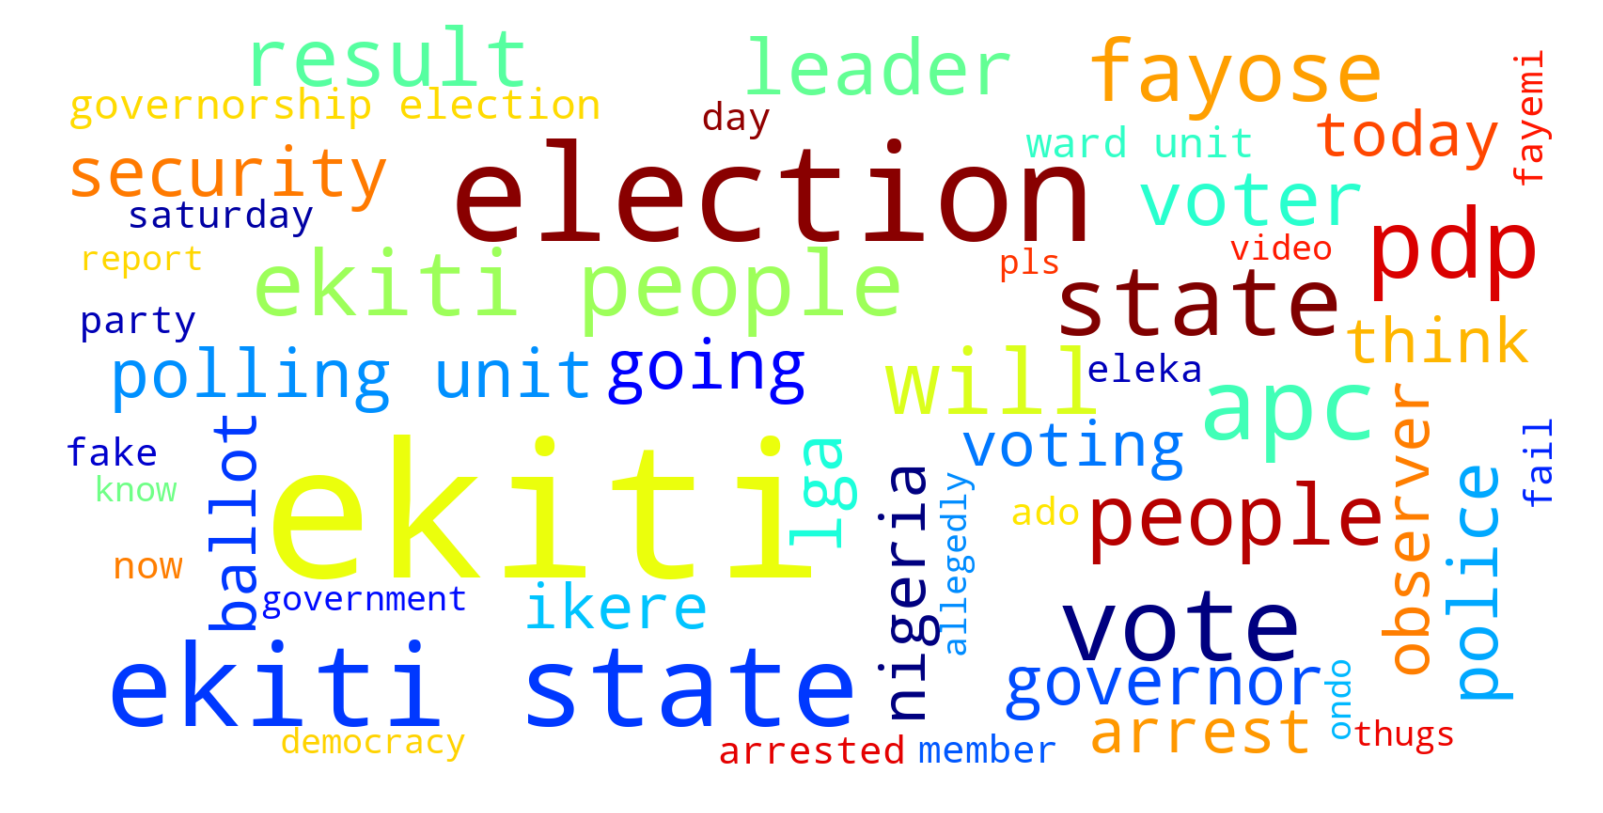

In [154]:
#negative- Original dataset
tw_neg = my_df[my_df['Sentiment'] == 'negative']['Content']
word_cloud(tw_neg)

# Comparative analysis using NB, LR, SVM and KNN


In [116]:
import snowballstemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
import re
import time

In [117]:
my_df = pd.read_csv("clean_ekitibinary.csv")

In [118]:
my_df['Sentiment'].value_counts()

positive    620
negative    102
Name: Sentiment, dtype: int64

In [119]:
df = my_df[['Content', 'Sentiment']].copy()

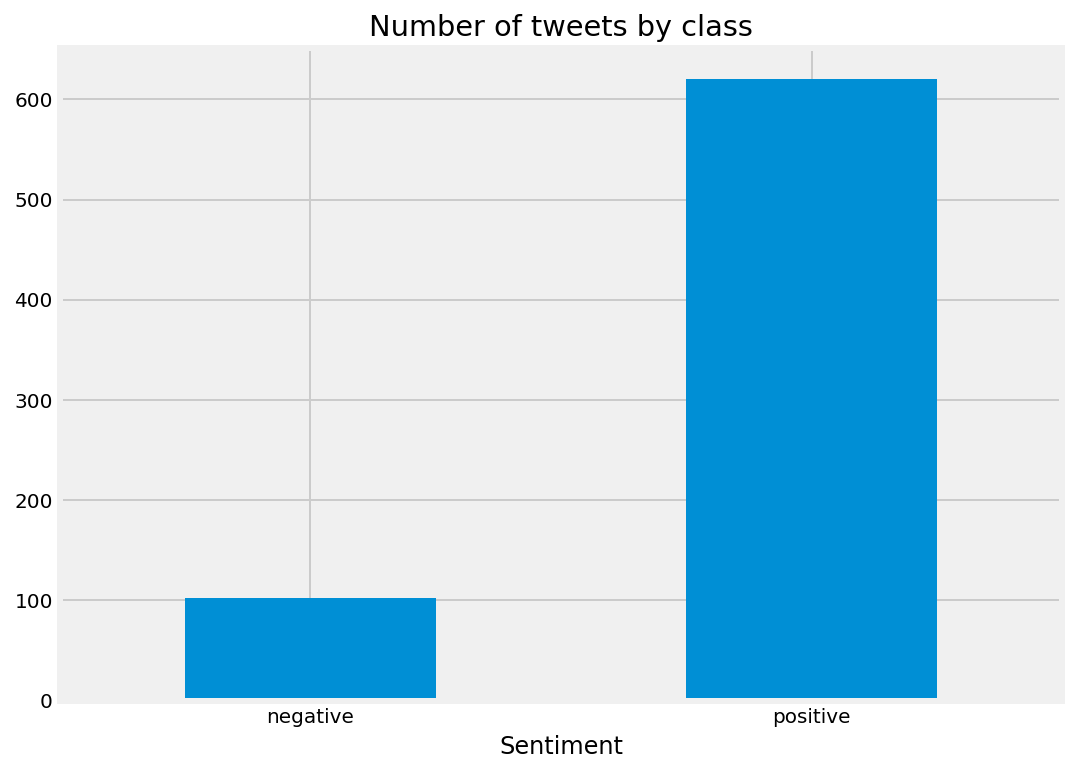

In [121]:
df.groupby(['Sentiment']).count().plot(kind='bar', figsize=(8, 6), rot=0, legend=False, title='Number of tweets by class')

# removing stop words

In [122]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Content.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

df['Content'] = cleaned_tweets

# Tokenization and lemmatization:

In [123]:
from nltk.stem import WordNetLemmatizer
# Tokenization
tokenized_tweet = df['Content'].apply(lambda x: x.split())
# Finding Lemma for each word
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
#joining words into sentences (from where they came from)
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

df['Content'] = tokenized_tweet

# Feature Extraction¶


In [124]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(df['Content'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(df['Content'])

In [125]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['Sentiment'])

In [126]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [127]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = BernoulliNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')
    print(f'Accuracy score- {metrics.accuracy_score(y_test, predictions)}')
    print(classification_report(y_test, predictions))
    print(f'confusion_matrix-{confusion_matrix(y_test,predictions)}')

In [128]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, df['target'], test_size=0.20, random_state=3)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 0.9298892988929889
Accuracy score- 0.8689655172413793
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.87      1.00      0.93       126

   micro avg       0.87      0.87      0.87       145
   macro avg       0.43      0.50      0.46       145
weighted avg       0.76      0.87      0.81       145

confusion_matrix-[[  0  19]
 [  0 126]]
Wall time: 299 ms


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [129]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, df['target'], test_size=0.20, random_state=3)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 0.9298892988929889
Accuracy score- 0.8689655172413793
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.87      1.00      0.93       126

   micro avg       0.87      0.87      0.87       145
   macro avg       0.43      0.50      0.46       145
weighted avg       0.76      0.87      0.81       145

confusion_matrix-[[  0  19]
 [  0 126]]
Wall time: 223 ms


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [130]:
def logicistregression(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = lr.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')
    print(f'Accuracy score- {metrics.accuracy_score(y_test, predictions)}')
    print(classification_report(y_test, predictions))
    print(f'confusion_matrix-{confusion_matrix(y_test,predictions)}')
   

In [144]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, df['target'], test_size=0.33, random_state=150)
logicistregression(X_train, X_test, y_train, y_test)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 Score - 0.9390519187358917
Accuracy score- 0.8870292887029289
              precision    recall  f1-score   support

           0       0.80      0.13      0.23        30
           1       0.89      1.00      0.94       209

   micro avg       0.89      0.89      0.89       239
   macro avg       0.84      0.56      0.58       239
weighted avg       0.88      0.89      0.85       239

confusion_matrix-[[  4  26]
 [  1 208]]
Wall time: 313 ms


In [143]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, df['target'], test_size=0.33, random_state=150)
logicistregression(X_train, X_test, y_train, y_test)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 Score - 0.9330357142857143
Accuracy score- 0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]
Wall time: 260 ms


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [133]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

In [135]:
def supportvector(X_train, X_test, y_train, y_test):
    
    clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='rbf'))
    clf.fit(X_train.toarray(), y_train)

    # predictions over test set
    
    predictions = clf.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')
    print(f'Accuracy score- {metrics.accuracy_score(y_test, predictions)}')
    print(classification_report(y_test, predictions))
    print(f'confusion_matrix-{confusion_matrix(y_test,predictions)}')

In [141]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, df['target'], test_size=0.33, random_state=150)
supportvector(X_train, X_test, y_train, y_test)

F1 Score - 0.9308755760368664
Accuracy score- 0.8744769874476988
              precision    recall  f1-score   support

           0       0.50      0.23      0.32        30
           1       0.90      0.97      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.70      0.60      0.62       239
weighted avg       0.85      0.87      0.85       239

confusion_matrix-[[  7  23]
 [  7 202]]
Wall time: 6.77 s


In [137]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, df['target'], test_size=0.33, random_state=150)
supportvector(X_train, X_test, y_train, y_test)

F1 Score - 0.9384965831435079
Accuracy score- 0.8870292887029289
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        30
           1       0.90      0.99      0.94       209

   micro avg       0.89      0.89      0.89       239
   macro avg       0.78      0.59      0.62       239
weighted avg       0.87      0.89      0.86       239

confusion_matrix-[[  6  24]
 [  3 206]]
Wall time: 9.81 s


In [145]:
#using KNN
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [148]:
def kneigbors(X_train, X_test, y_train, y_test):
    #trying to determine the best knearest neighbor
    for i in range(1,30):
        knn=KNeighborsClassifier(n_neighbors = i)
        knnModel = knn.fit(X_train.toarray(),y_train)
        knnPredict =knnModel.predict(X_test.toarray())
        w = f1_score(y_test, knnPredict)
        x = metrics.accuracy_score(y_test, knnPredict)
        b = classification_report(y_test, knnPredict)
        print (i)
        print (w)
        print(x) 
        print (b)
        print(f'confusion_matrix-{confusion_matrix(y_test,knnPredict)}')

In [149]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, df['target'], test_size=0.33, random_state=150)
kneigbors(X_train, X_test, y_train, y_test)

1
0.910377358490566
0.8410041841004184
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        30
           1       0.90      0.92      0.91       209

   micro avg       0.84      0.84      0.84       239
   macro avg       0.62      0.60      0.60       239
weighted avg       0.83      0.84      0.83       239

confusion_matrix-[[  8  22]
 [ 16 193]]
2
0.8693467336683418
0.7824267782426778
              precision    recall  f1-score   support

           0       0.28      0.47      0.35        30
           1       0.92      0.83      0.87       209

   micro avg       0.78      0.78      0.78       239
   macro avg       0.60      0.65      0.61       239
weighted avg       0.84      0.78      0.80       239

confusion_matrix-[[ 14  16]
 [ 36 173]]
3
0.918552036199095
0.8493723849372385
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      0.97      

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


11
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


12
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


13
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


14
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


15
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


17
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


18
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


19
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


20
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


21
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


22
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


23
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


24
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


25
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


26
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


27
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


28
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]
29
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]
Wall time: 42.1 s


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [150]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, df['target'], test_size=0.33, random_state=150)
kneigbors(X_train, X_test, y_train, y_test)

1
0.9311926605504587
0.8744769874476988
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        30
           1       0.89      0.97      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.70      0.59      0.61       239
weighted avg       0.84      0.87      0.85       239

confusion_matrix-[[  6  24]
 [  6 203]]
2
0.9212962962962962
0.8577405857740585
              precision    recall  f1-score   support

           0       0.38      0.20      0.26        30
           1       0.89      0.95      0.92       209

   micro avg       0.86      0.86      0.86       239
   macro avg       0.63      0.58      0.59       239
weighted avg       0.83      0.86      0.84       239

confusion_matrix-[[  6  24]
 [ 10 199]]
3
0.9282511210762331
0.8661087866108786
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      0.99    

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


5
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]
6
0.9306487695749441
0.8702928870292888
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.81       239

confusion_matrix-[[  0  30]
 [  1 208]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


7
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


8
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


9
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


10
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


11
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


12
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


13
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


14
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


15
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


17
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


18
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


19
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


20
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


21
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


22
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


23
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


24
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


25
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


26
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


27
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


28
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]
29
0.9330357142857143
0.8744769874476988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.87      1.00      0.93       209

   micro avg       0.87      0.87      0.87       239
   macro avg       0.44      0.50      0.47       239
weighted avg       0.76      0.87      0.82       239

confusion_matrix-[[  0  30]
 [  0 209]]
Wall time: 48.2 s


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
